# Assignment 1(due on 12/06)

## Student:余哲（12332280），Gtihub：atheistmao

## 批改人：张鹏

## 得分：27/30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


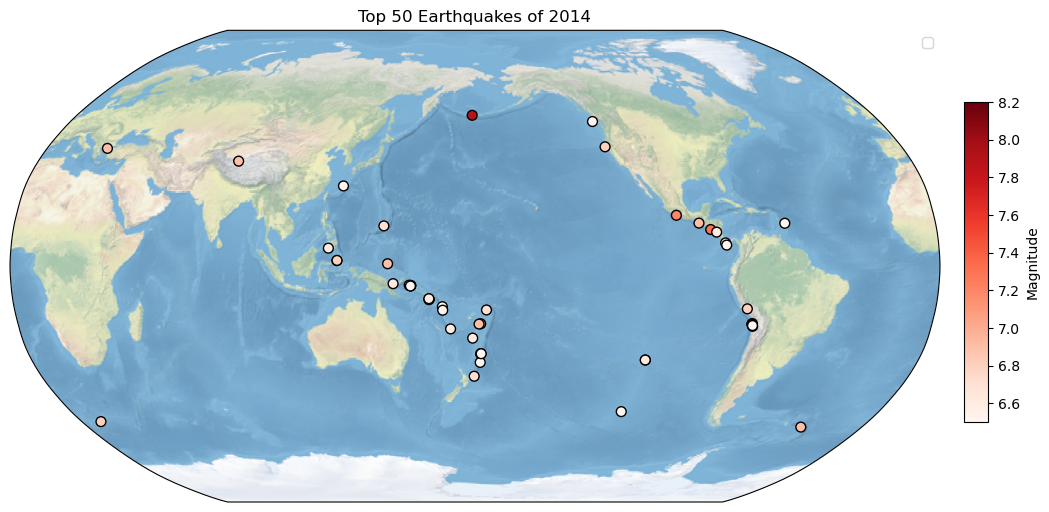

In [2]:
#Q1.Global Earthquakes
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import LAND, OCEAN, COASTLINE, BORDERS
from matplotlib.cm import Reds
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

# Load earthquake data
Sig_Eqs = pd.read_csv('usgs_earthquakes.csv')
Sig_Eqs['year'] = Sig_Eqs['time'].str.split('-').str[0]

# Filter earthquakes from 2014
df_2014 = Sig_Eqs[Sig_Eqs['year'] == '2014']

# Select top 50 earthquakes by magnitude
top_50_eqs = df_2014.nlargest(50, 'mag')

# Create a scatter plot on a map with a rotated Robinson projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})  
# Adjust the central_longitude and figure size as needed
plt.title('Top 50 Earthquakes of 2014')
ax.set_global()
ax.stock_img()
# Scatter plot with color-mapped magnitudes
scatter = ax.scatter(top_50_eqs['longitude'], top_50_eqs['latitude'], transform=ccrs.PlateCarree(), c=top_50_eqs['mag'], cmap=Reds, s=50, marker='o', edgecolor='k') 

# Add color bar
cbar = ColorbarBase(ax=fig.add_axes([0.92, 0.3, 0.02, 0.4]), cmap=Reds, norm=Normalize(vmin=top_50_eqs['mag'].min(), vmax=top_50_eqs['mag'].max()), orientation='vertical', label='Magnitude')  

# Show legend and title
ax.legend()

# Show the plot
plt.show()

### 第一题代码运行正常，可以输出正确的图像。
### 得分：10/10
### ----------------------------------------------------

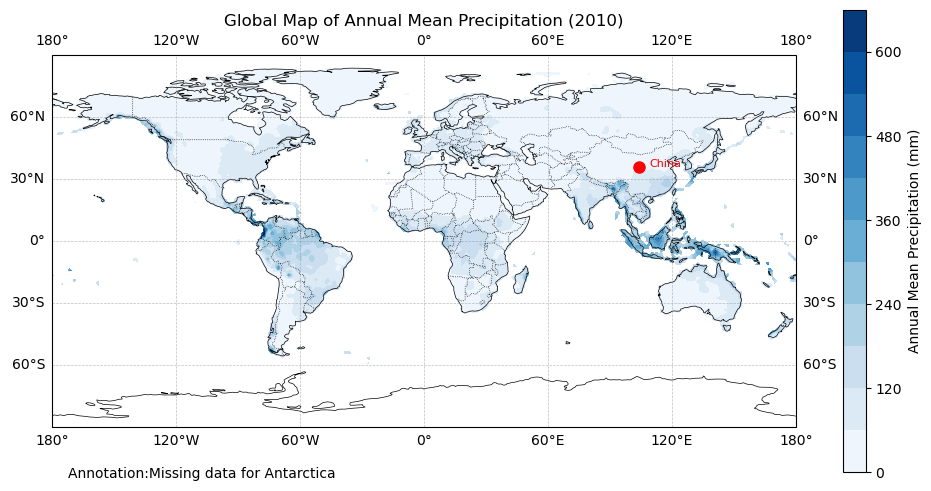

In [4]:
#Q2.Explore a netCDF dataset
#Q2.1
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load netCDF dataset
ds = xr.open_dataset('precip.monitor.mon.total.1x1.v2020.nc')

# Select data for the year 2010
precipitation_2010 = ds['precip'].sel(time='2010')

# Calculate the annual mean
annual_mean_precipitation = precipitation_2010.mean(dim='time')

# Extract latitude and longitude
lat = ds['lat']
lon = ds['lon']

# Create a global map
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Plot annual mean precipitation on the map
c = ax.contourf(lon, lat, annual_mean_precipitation, transform=ccrs.PlateCarree(), cmap='Blues', levels=10)

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Global Map of Annual Mean Precipitation (2010)')

# Add colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.05, aspect=20)
cbar.set_label('Annual Mean Precipitation (mm)')

# Add annotation below the plot
fig.text(0.25, 0.1, 'Annotation:Missing data for Antarctica', ha='center', fontsize=10)

# Add a point and label for China
china_lat, china_lon = 35.8617, 104.1954  # Coordinates for China
ax.plot(china_lon, china_lat, 'ro', markersize=8, transform=ccrs.PlateCarree(), label='China')
ax.text(china_lon + 5, china_lat, 'China', transform=ccrs.PlateCarree(), fontsize=8, color='red')

# Save or show the plot
plt.savefig('global_annual_mean_precipitation_2010_with_china.png', dpi=300, bbox_inches='tight')
plt.show()


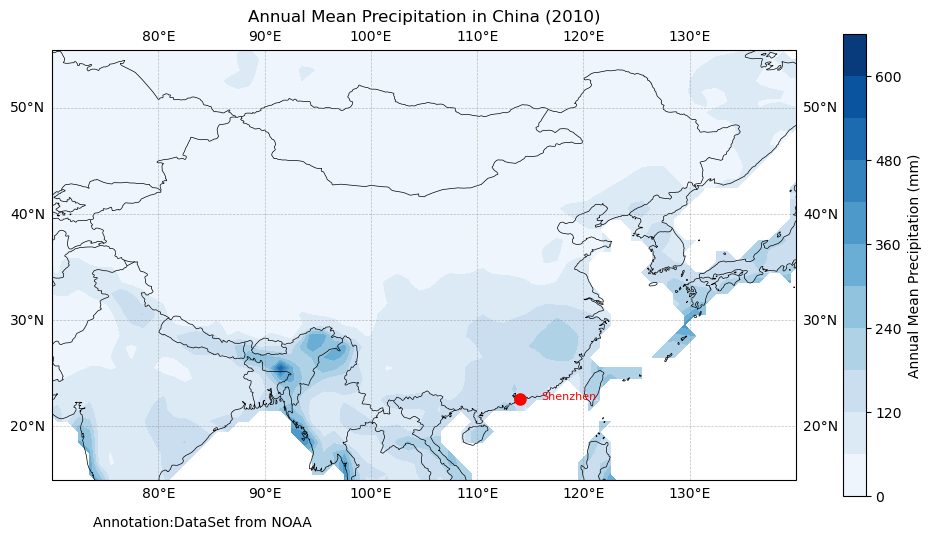

In [6]:
#Q2.2
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load netCDF dataset
ds = xr.open_dataset('precip.monitor.mon.total.1x1.v2020.nc')

# Select data for the year 2010
precipitation_2010 = ds['precip'].sel(time='2010')

# Calculate the annual mean
annual_mean_precipitation = precipitation_2010.mean(dim='time')

# Extract latitude and longitude
lat = ds['lat']
lon = ds['lon']

# Define the latitude and longitude range for China
china_lon_range = [70, 140]
china_lat_range = [15, 50]

# Create a map with China's extent
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([china_lon_range[0], china_lon_range[1], china_lat_range[0], china_lat_range[1]])

# Plot annual mean precipitation on the map
c = ax.contourf(lon, lat, annual_mean_precipitation, transform=ccrs.PlateCarree(), cmap='Blues', levels=10)

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='black')

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Annual Mean Precipitation in China (2010)')

# Add colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.05, aspect=20)
cbar.set_label('Annual Mean Precipitation (mm)')

# Add annotation below the plot
fig.text(0.25, 0.06, 'Annotation:DataSet from NOAA', ha='center', fontsize=10)

# Add a point and label for Shenzhen
shenzhen_lat, shenzhen_lon = 22.5431, 114.0579  # Coordinates for Shenzhen
ax.plot(shenzhen_lon, shenzhen_lat, 'ro', markersize=8, transform=ccrs.PlateCarree(), label='Shenzhen')
ax.text(shenzhen_lon + 2, shenzhen_lat, 'Shenzhen', transform=ccrs.PlateCarree(), fontsize=8, color='red')

# Save or show the plot
plt.savefig('annual_mean_precipitation_china.png', dpi=300, bbox_inches='tight')
plt.show()


### 第二题代码运行正常，可以输出正确图像；
### 第一张图缺少x、y轴的经纬度文字（但添加了代码）、legend 
### 第二张图缺少缺少x、y轴的经纬度文字（但添加了代码）、legend 
### 得分：17/20
### 可以试一下plt.text(0, -115,  "Longitude", fontsize=10,transform=plt.gca().transData, horizontalalignment='center', color='k')
### ----------------------------------------------------